<a href="https://colab.research.google.com/github/clintblythe/UTAI-Python/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
path="/content/drive/MyDrive/Python Course/foodhub_order.csv"
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape

(1898, 9)

#### Observations:
1897 rows with 9 columns present

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
integer, object (string), and float (decimal/money)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
No null values but we do have unreported data values in the rating column.  I have devised a method to replace that missing data with the MEAN value of the data we do have.  This approach is laid out in Question 6 below for 'ratings'.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Food Preparation Times (minutes)


*   Min
    20
*   Max
    35
*   Average
    27.4



### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
(df['rating'] == 'Not given').value_counts()

False    1162
True      736
Name: rating, dtype: int64

#### Observations:
736 instances where data was not reported and marked as 'Not given'

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Data Columns
* order_id                 
* customer_id              
* restaurant_name          
* cuisine_type             
* cost_of_the_order        
* day_of_the_week          
* rating                   
* food_preparation_time    
* delivery_time            

In [9]:
df['order_id'].nunique()

1898

<Axes: xlabel='order_id', ylabel='order_id'>

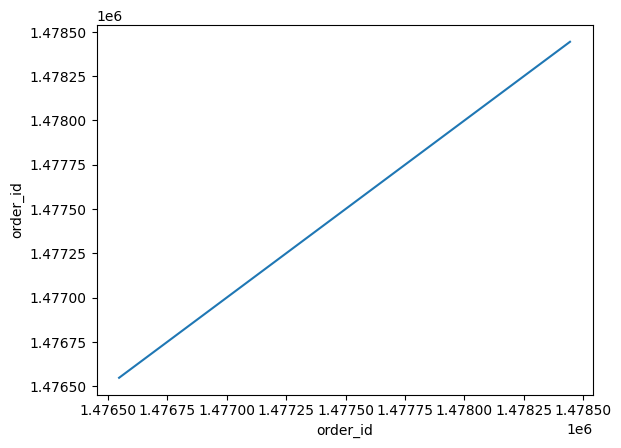

In [10]:
sns.lineplot(data=df, x='order_id', y='order_id')

#### Observations:
We can see that the order_id data is most likely a generated index key as the values are linear.

In [11]:
df['customer_id'].nunique()

1200

#### Observations:
There appears to be 1200 unique 'customer_id' values.

<Axes: xlabel='customer_id', ylabel='count'>

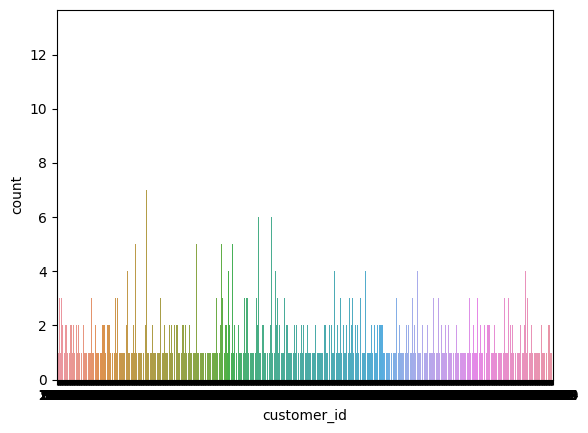

In [12]:
sns.countplot(data=df, x='customer_id')

#### Observations:
We can see most customer_id entries were only done once, i.e. likely just one order.  The highest number of customer orders being 7.

In [13]:
df['restaurant_name'].nunique()

178

<Axes: xlabel='restaurant_name', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


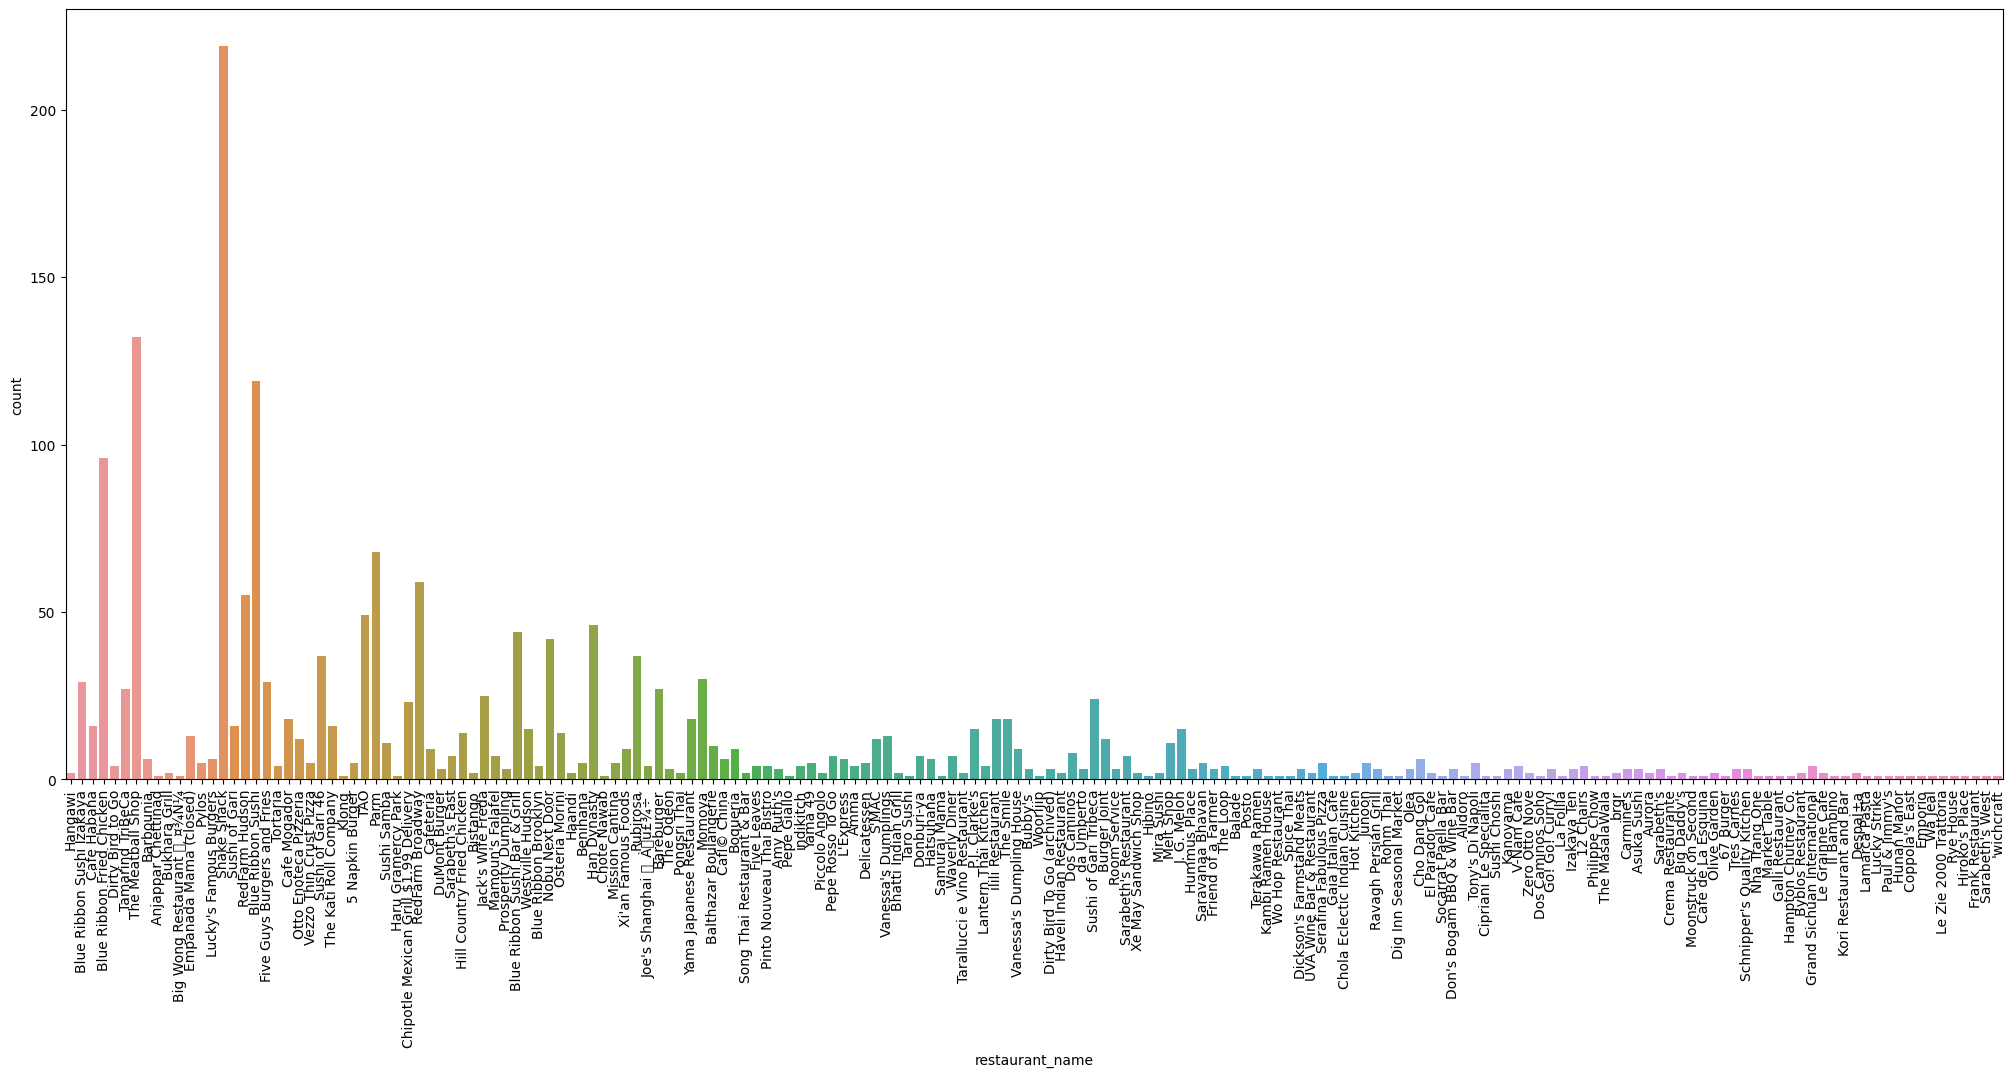

In [14]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.countplot(data=df, x='restaurant_name')

#### Observations:
We can see there are multiple entries for some restaurants but most restaurants have only a few orders.

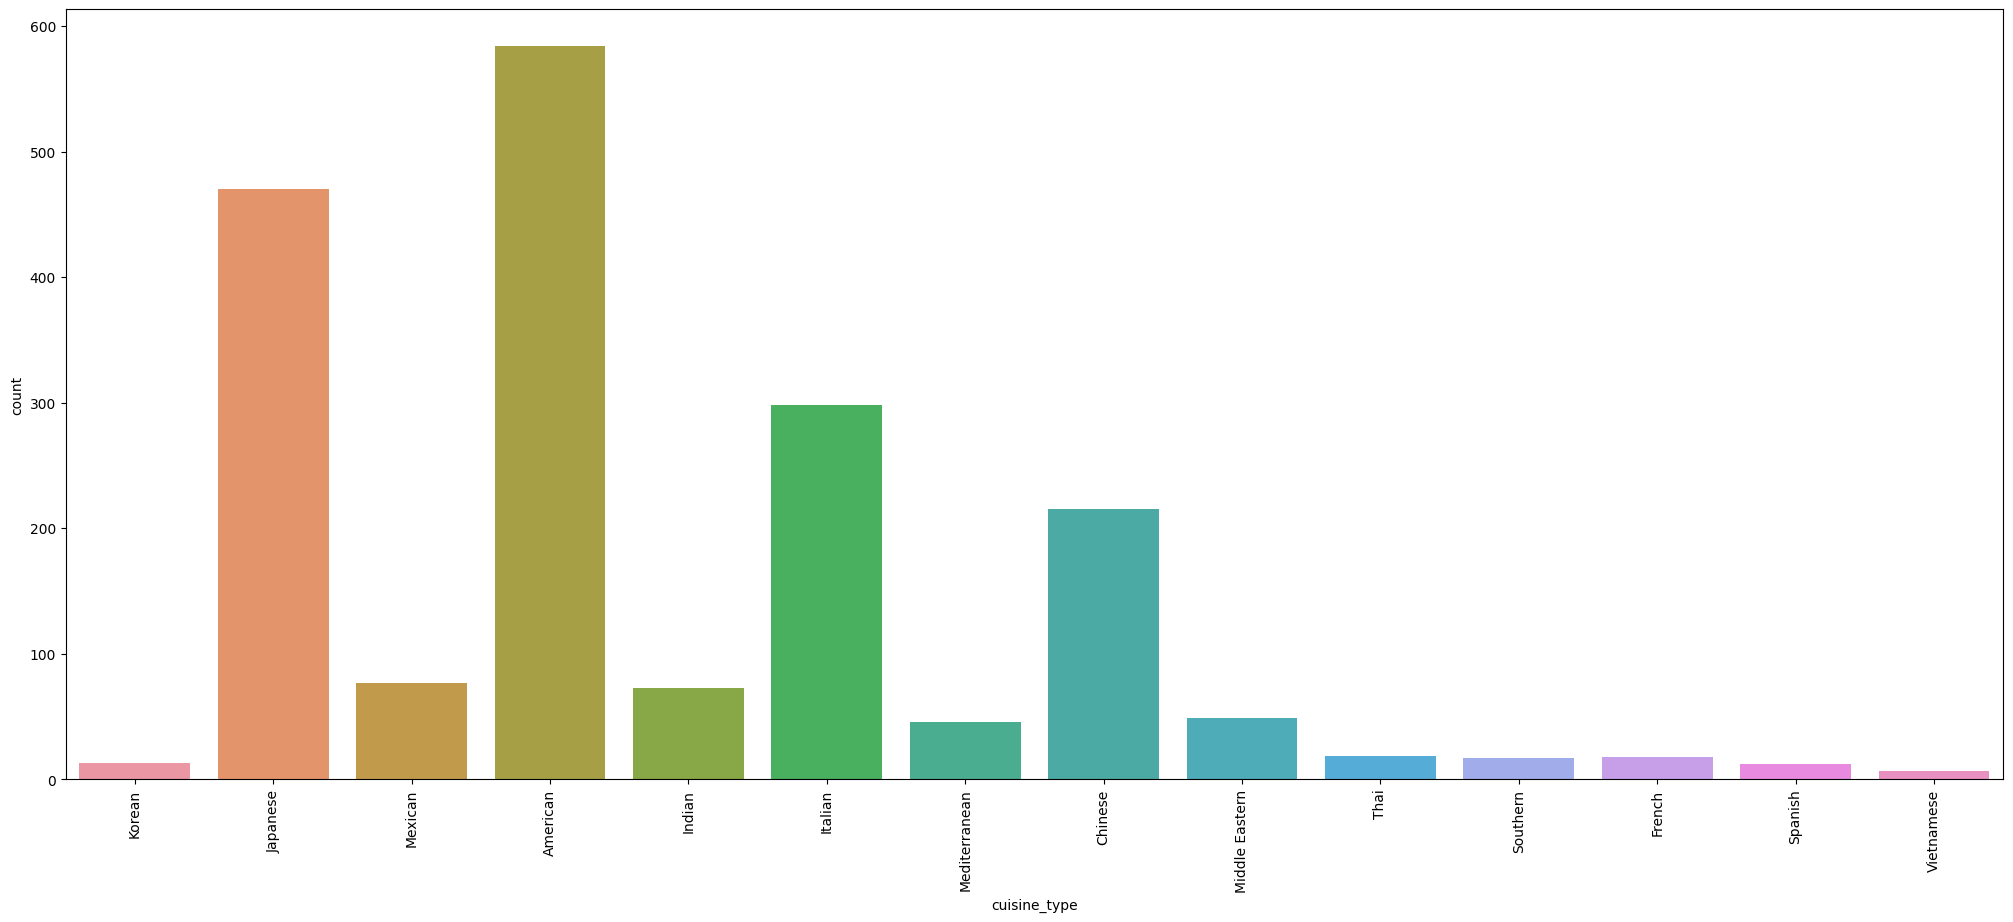

In [15]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.countplot(data=df,x='cuisine_type');

#### Observations:
American cuisine followed by Japanese appear most often.

<Axes: xlabel='cost_of_the_order'>

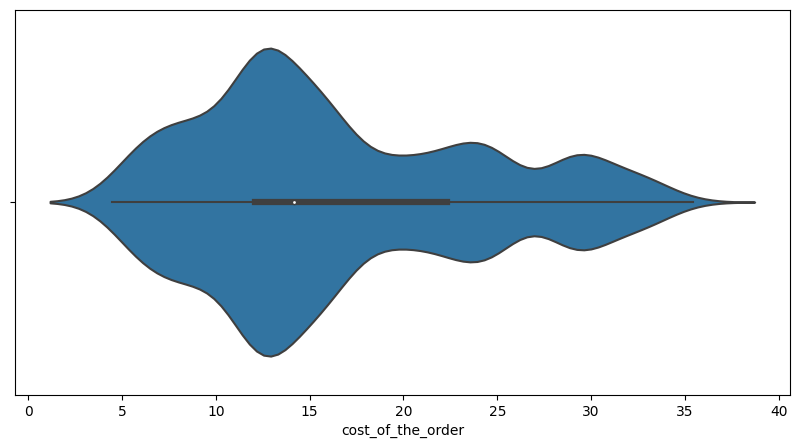

In [16]:
plt.figure(figsize=(10,5))

# order cost distribution by day of the week
sns.violinplot(data=df, x='cost_of_the_order')

#### Observations:
Right skewed with most orders costing less than \$15 with a few orders at or above \$35 and at or below \$5

<Axes: xlabel='day_of_the_week', ylabel='count'>

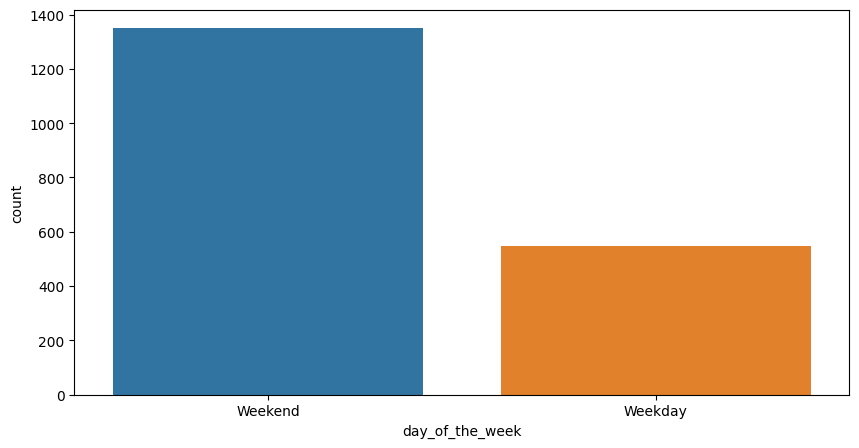

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_the_week')

#### Observations:
Roughly 2.5 more weekend (\~1350) orders than on weekday (\~525)

<Axes: xlabel='cost_of_the_order', ylabel='day_of_the_week'>

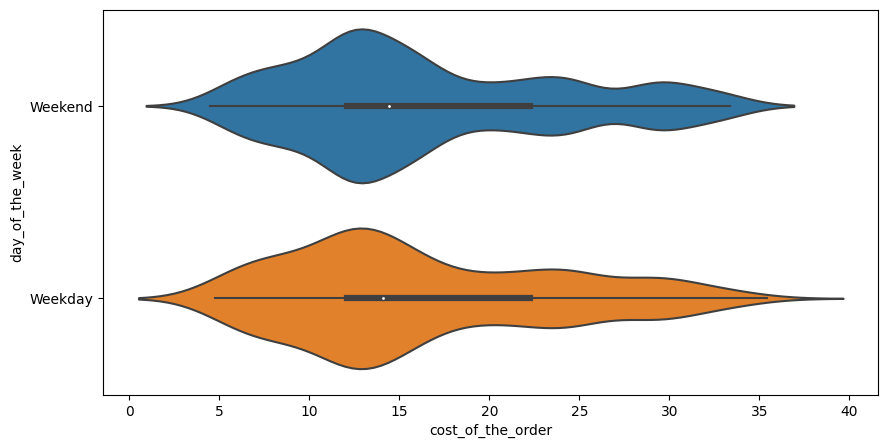

In [18]:
plt.figure(figsize=(10,5))

# order cost distribution by day of the week
sns.violinplot(data=df, x='cost_of_the_order', y='day_of_the_week')


#### Observations:
Roughly the same right skewed 'cost_of_the_order' distribution

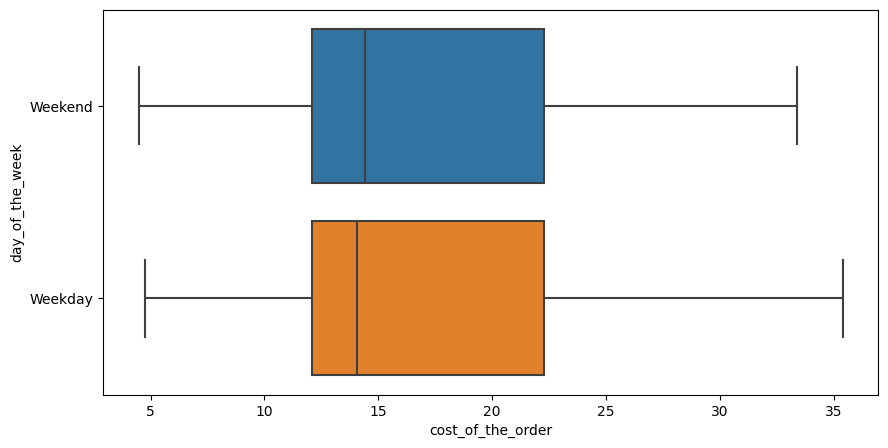

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='cost_of_the_order', y='day_of_the_week');

#### Observations:
I went ahead and broke the cost of the orders down by day of the week but we can see both in comparison. We can see that the cost of the orders is largely the same regardless of the day of the week, however, there are a few more higher priced orders on any given weekday but this is only a small fraction of the orders.


<Axes: xlabel='rating', ylabel='count'>

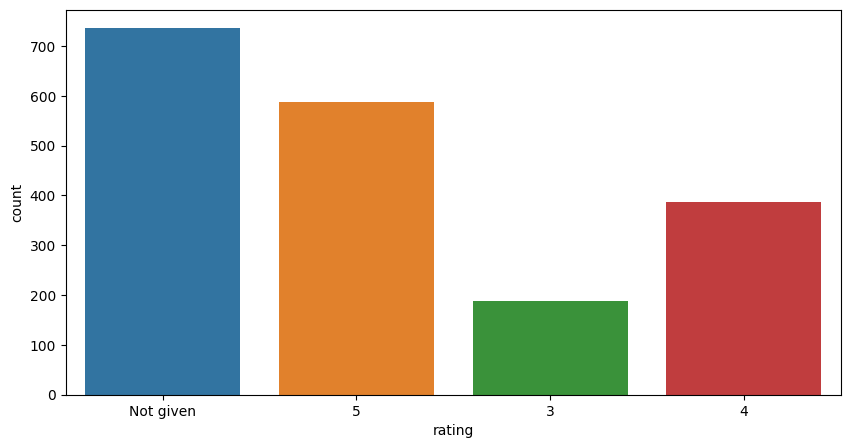

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', )

In [21]:
df3 = df['rating'].value_counts()
ttl = df3['5'] + df3['4'] + df3['3']
# print ('Total Ratings Count: ' + str(ttl))
a5 = df3['5']/ttl
a4 = df3['4']/ttl
a3 = df3['3']/ttl

tmean = (5*a5 + 4*a4 + 3*a3)

In [22]:
print ('Entries: ' + str(ttl))
print ('5: ' + str(a5))
print ('4: ' + str(a4))
print ('3: ' + str(a3))
print ('MEAN: ' + str(tmean))

Entries: 1162
5: 0.5060240963855421
4: 0.33218588640275387
3: 0.16179001721170397
MEAN: 4.344234079173838


#### Observations:
Majority of ratings are 'Not given' and aren't a number so we would need to devise a method of adding a rating given the data knowledge we have or remove the entries which unfortunately is a large percentage of our overall data for this column.  I have computed a value for the MEAN ignoring the 'Not given' data which could then be substituted for the missing data.

<Axes: xlabel='food_preparation_time', ylabel='count'>

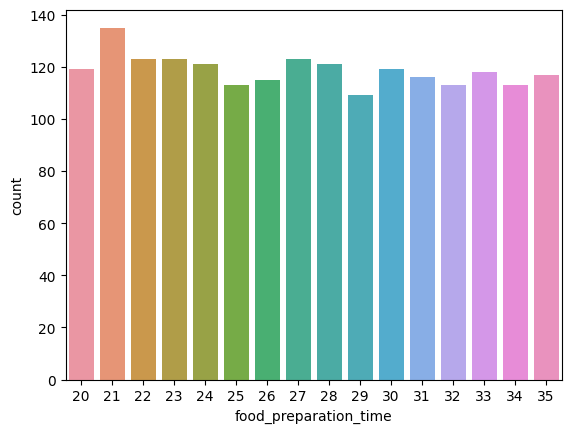

In [23]:
# Food Prep
sns.countplot(data=df, x='food_preparation_time')

#### Observations:
Food preparation times can vary pretty widely.  No real surprises here.

<Axes: xlabel='delivery_time', ylabel='count'>

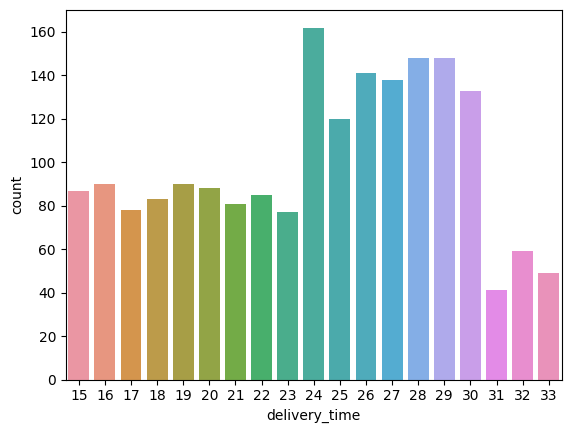

In [24]:
# Delivery Time
sns.countplot(data=df, x='delivery_time')

<Axes: xlabel='delivery_time', ylabel='day_of_the_week'>

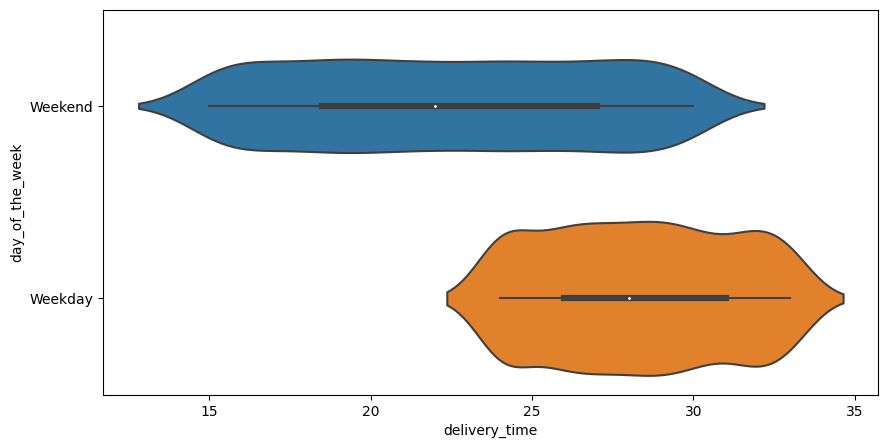

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='delivery_time', y='day_of_the_week')

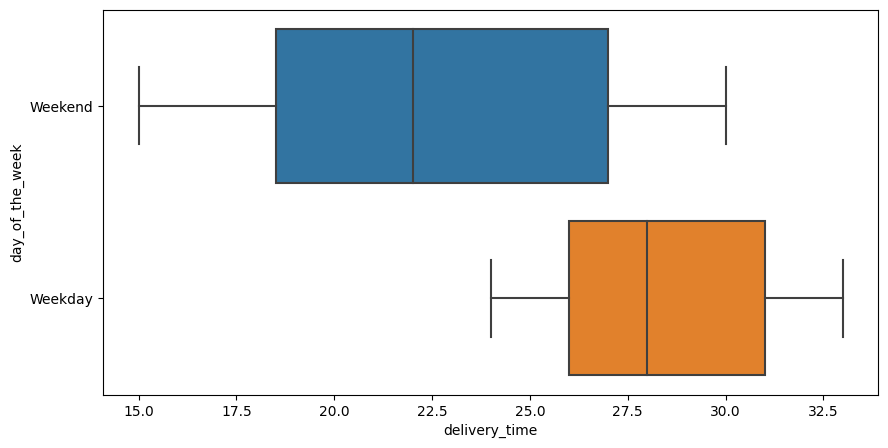

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week');

#### Observations:
According to the violinplot it appears Weekend delivery is noticeably faster and weekday delivery is reliably slow.  Using the boxplot shows the same visual pattern with a bit more resolution.

In [27]:
df[['cost_of_the_order','food_preparation_time', 'delivery_time']].describe()

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


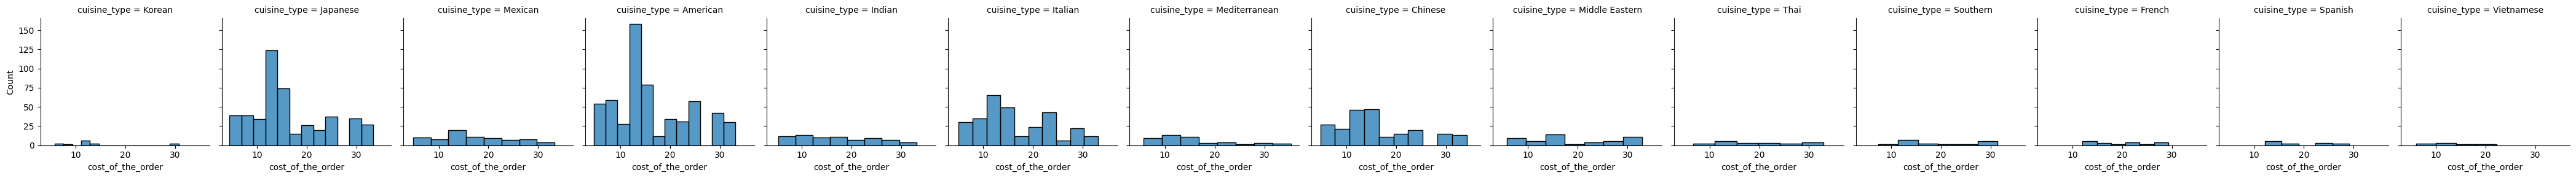

In [28]:
# Subplots
g1 = sns.FacetGrid(df, col='cuisine_type')
g1.map(sns.histplot, 'cost_of_the_order');

#### Observations:
American and Japanese items are generally cost more than the other cuisines types.

<Axes: xlabel='food_preparation_time', ylabel='Count'>

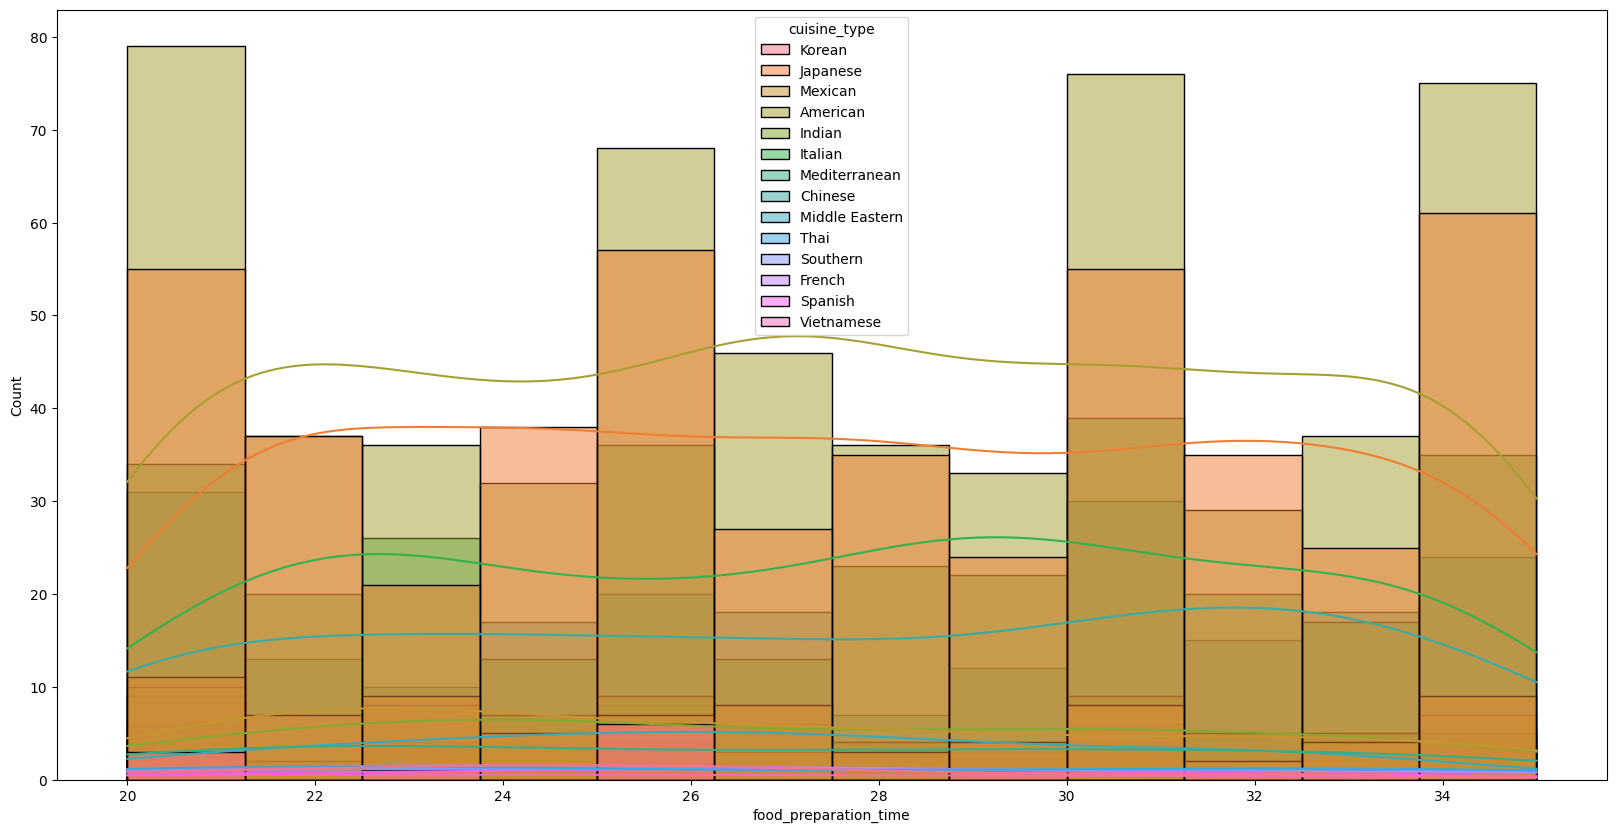

In [29]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='food_preparation_time', hue='cuisine_type', kde=True)

#### Observations:
Food preparation time seems to vary widely based on the cuisine.  One interesting observation is the fastest prepared items are also some of the most popular.

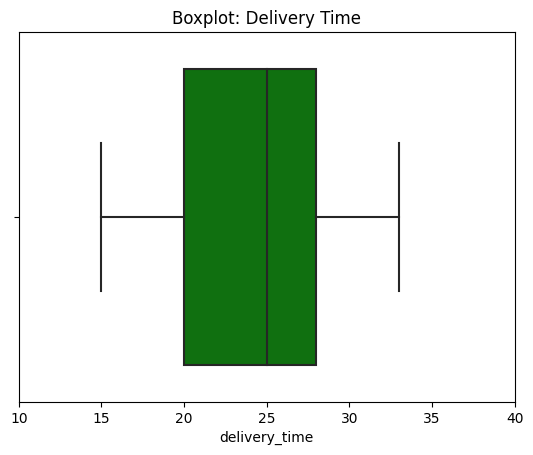

In [30]:
plt.title('Boxplot: Delivery Time')
plt.xlim(10,40)
plt.xlabel('Minutes')
sns.axes_style('darkgrid')
sns.boxplot(data=df, x='delivery_time', color='green');

#### Observations:
Delivery time doesn't appear to vary more than 5 minutes from the median which isn't too surprising as the contents shouldn't directly affect traffic conditions.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [31]:
df1 = df['restaurant_name'].value_counts().sort_values(ascending=False)
df1.head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Top 5 Restaurants by Order Entries
1. Shake Shack                  219
2. The Meatball Shop            132
3. Blue Ribbon Sushi            119
4. Blue Ribbon Fried Chicken     96
5. Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [32]:
df.groupby(by = ['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
American cuisine is the most popular on Weekends (415)

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [33]:
 (df[df['cost_of_the_order'] > 20]['cost_of_the_order'].count() / df['cost_of_the_order'].count()) * 100

29.24130663856691

#### Observations:
The percentage of orders greater than \$20 is 29.2%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [34]:
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:
Mean order delivery time is 24.16 (minutes)

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [35]:
df1 = df['customer_id'].value_counts().sort_values(ascending=False)
df1[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [36]:
# just verifying
df[df['customer_id'].isin([52832])]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
247,1478179,52832,Han Dynasty,Chinese,12.23,Weekend,3,33,27
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4,25,25
517,1476916,52832,Dickson's Farmstand Meats,American,15.72,Weekend,4,23,28
526,1478160,52832,Donburi-ya,Japanese,15.86,Weekday,5,28,28
632,1478265,52832,Dos Caminos,Mexican,16.06,Weekend,Not given,35,19
670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,Not given,32,20
855,1477041,52832,Junoon,Indian,25.17,Weekday,Not given,23,24
1039,1477013,52832,Donburi-ya,Japanese,8.01,Weekday,5,30,30
1070,1476828,52832,Donburi-ya,Japanese,6.64,Weekday,Not given,21,29
1105,1478245,52832,Junoon,Indian,29.49,Weekend,5,23,17


#### Observations:
1. 52832     13
2. 47440     10
3. 83287      9

### Multivariate Analysis

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


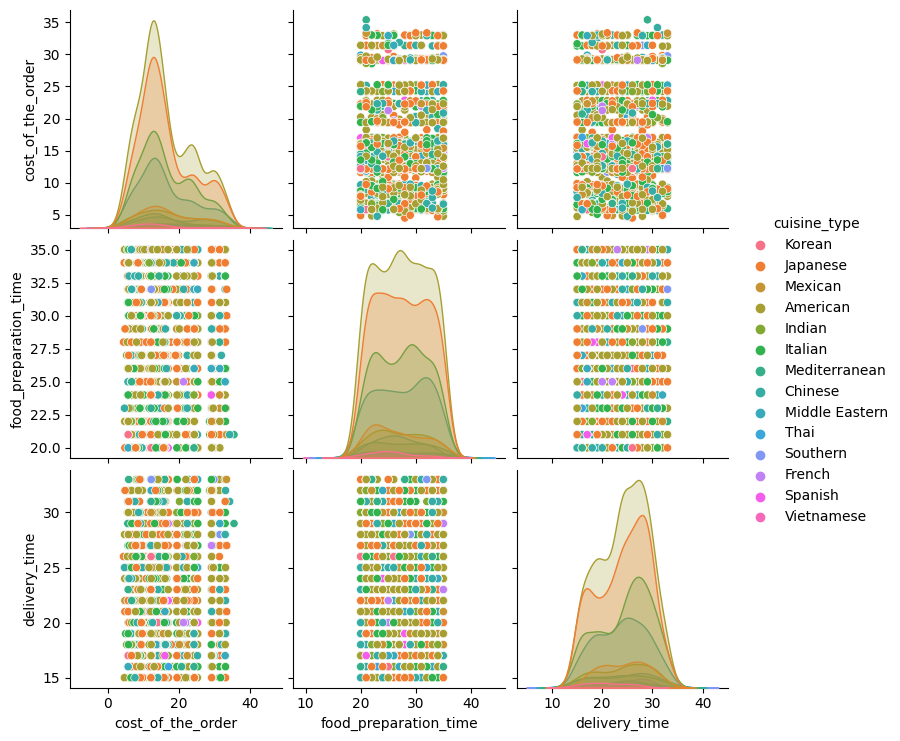

In [38]:
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time','delivery_time'], hue='cuisine_type')

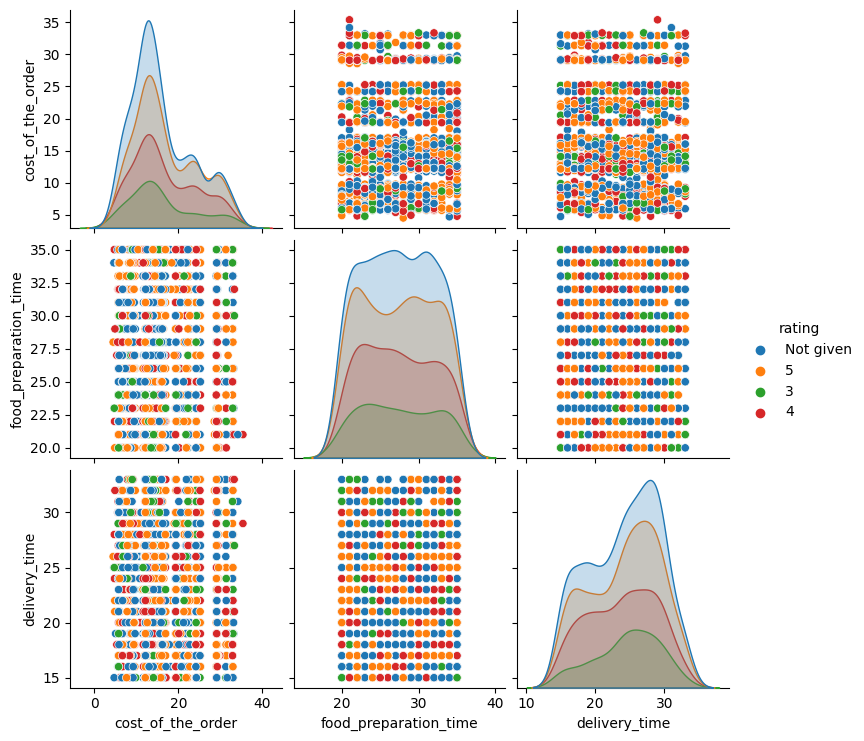

In [39]:
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time','delivery_time'], hue='rating')

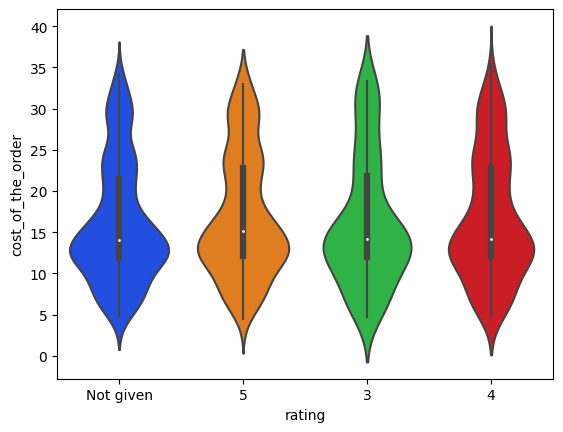

In [40]:
sns.violinplot(data=df, x='rating', y='cost_of_the_order', palette="bright");

#### Observations:
Strangly similar distributions regardless of the rating.  One would hope that higher cost orders would have a higher density of high ratings but it's seems to be not highly correlated.

<ipython-input-41-e59f2ac1a00d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


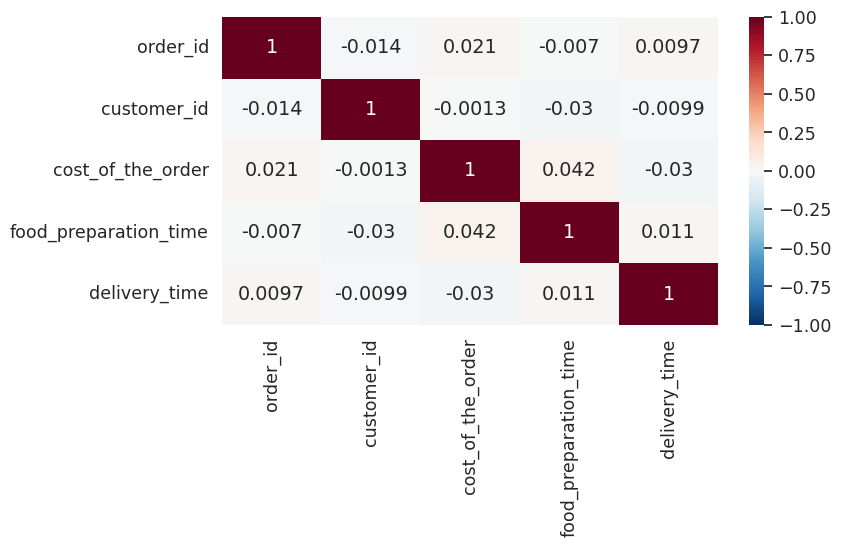

In [41]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df.corr(),
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1);

#### Observations:
Not seeing a strong correlation between the variables.  Appears to be a slight correlation between food preparation time and cost of the order but it's fairly  weak.

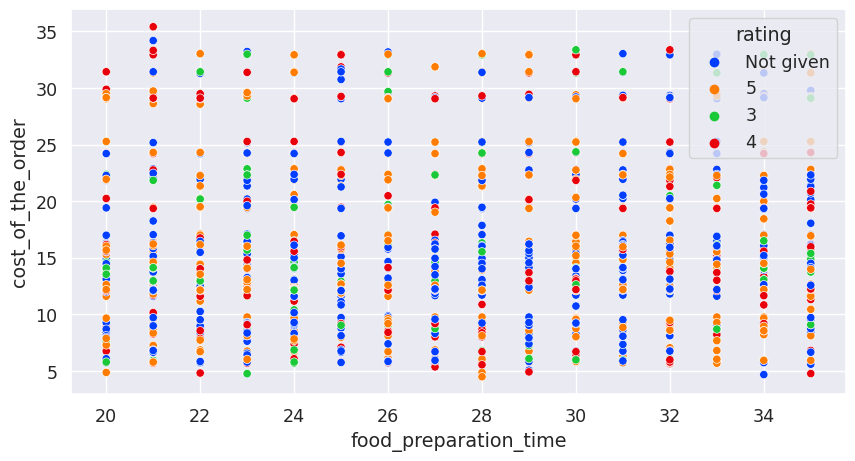

In [42]:
plt.figure(figsize=(10,5))
plt.legend(loc='upper right')
sns.scatterplot(
    y='cost_of_the_order',
    x='food_preparation_time',
    data=df,
    palette='bright',
    hue='rating');

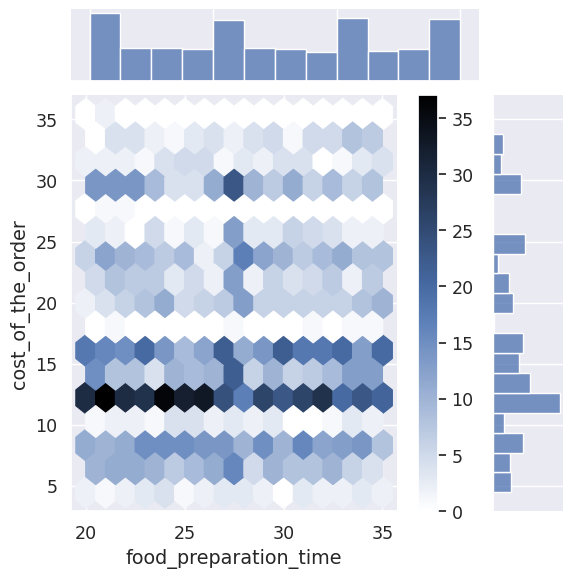

In [43]:
sns.jointplot(data=df, x='food_preparation_time', y='cost_of_the_order', kind="hex");
plt.colorbar();

#### Observations:
Pulled up the jointplot to see the density of the data as the scatterplot above wasn't very helpful.  We can now see the high density of orders between the $10-15 range and majority of food preparation 20-27mins in length.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [44]:
df4 = df.copy()    # deep copy
# replace bad data and update to numeric type
df4['rating'] = df4['rating'].replace(['Not given'],np.nan)
df4['rating'] = df4['rating'].astype(float)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [45]:
# replace missing values with MEAN for this example case
df4.fillna(df4['rating'].mean(), inplace=True)
df4.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.344234,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.344234,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24


In [46]:

average_ratings = df4.groupby('restaurant_name')['rating'].mean()
ratings_count = df4.groupby('restaurant_name')['rating'].count()
ratings_count_qualified_businesses = ratings_count[ratings_count > 50].index
promotional_offer_businesses = average_ratings[average_ratings > 4].index.intersection(ratings_count_qualified_businesses)

In [47]:
print(average_ratings)
print(promotional_offer_businesses)

restaurant_name
'wichcraft          5.000000
12 Chairs           4.422117
5 Napkin Burger     4.206540
67 Burger           5.000000
Alidoro             4.344234
                      ...   
Zero Otto Nove      4.172117
brgr                3.672117
da Umberto          4.562823
ilili Restaurant    4.206732
indikitch           4.422117
Name: rating, Length: 178, dtype: float64
Index(['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Parm',
       'RedFarm Broadway', 'RedFarm Hudson', 'Shake Shack',
       'The Meatball Shop'],
      dtype='object', name='restaurant_name')


#### Observations:
Given my treatment of the ratings data (applying the MEAN [4.34] to the missing data) there are 7 businesses that qualify for the promotion.

1. 'Blue Ribbon Fried Chicken'
2. 'Blue Ribbon Sushi'
3. 'Parm'
4. 'RedFarm Broadway'
5. 'RedFarm Hudson'
6. 'Shake Shack'
7. 'The Meatball Shop'

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [52]:
qualified_orders_gt20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order']
qualified_orders_gt05 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order']
total_revenue = df['cost_of_the_order'].sum()
total_charges = (qualified_orders_gt20.sum() * .25) + (qualified_orders_gt05.sum() * .15)
print ('Total Revenue: ' + str(total_revenue))
print ('Total Charges: ' + str(round(total_charges,2)))
print ('Net Revenue: ' + str(round(total_revenue - total_charges,2)))

Total Revenue: 31314.82
Total Charges: 6166.3
Net Revenue: 25148.52


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [56]:
df['ttd'] = df['delivery_time'] + df['food_preparation_time']
filtered_df = df[df['ttd'] > 60]
total_orders = len(df)
filtered_orders = len(filtered_df)
percentage = (filtered_orders / total_orders) * 100
print ('Total Orders: ' + str(total_orders))
print ('Orders > 60min: ' + str(filtered_orders))
print ('[%] Orders > 60min: ' + str(round(percentage,2)) + '%')

Total Orders: 1898
Orders > 60min: 200
[%] Orders > 60min: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

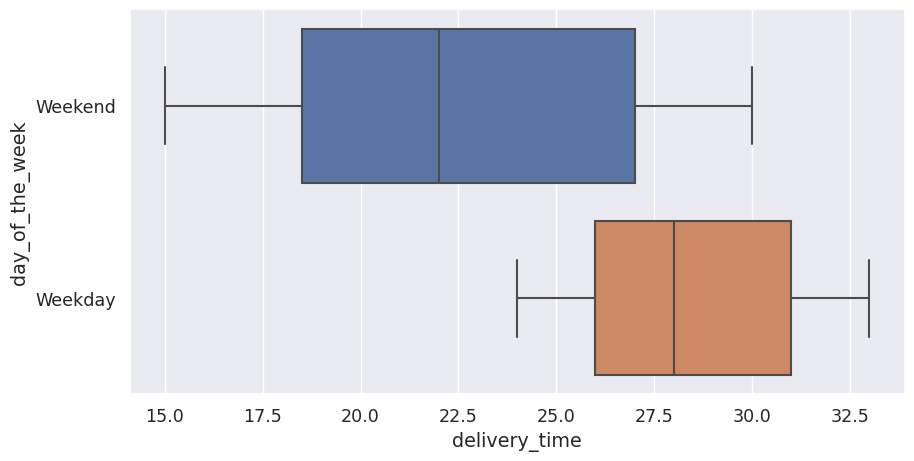

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week');

In [51]:
df.groupby('day_of_the_week')['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,28.340037,2.891428,24.0,26.0,28.0,31.0,33.0
Weekend,1351.0,22.470022,4.628938,15.0,18.5,22.0,27.0,30.0


#### Observations:
Mean Weekday time is 28.34 minutes which is *almost* 6 minutes slower than Weekend delivery of 22.47 minutes.  Note also that more than double deliveries are completed on the Weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---